### <bold>Preparação dos dados</bold>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ajuste para 2 casas decimais
pd.options.display.float_format = '{:,.2f}'.format

Text(0.5, 1.0, 'Paleta de Cores - Ministério da Fazenda')

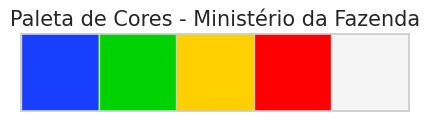

In [34]:
# Escolha de tema e paleta de cores
sns.set_theme(style='whitegrid')
pallette = ['#183FFE', '#00D100', '#FFD000','#FE0002', '#f5f5f5']
sns.palplot(pallette)
plt.title('Paleta de Cores - Ministério da Fazenda', loc = 'center', fontsize = 15)

In [4]:
cred = pd.read_csv('/home/cristina/Public/projetos/python-insights/database/operacoes_uniao.csv', 
                   encoding = 'latin1', 
                   sep = ';')

In [5]:
cred.head()

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",00000.000000/0021-94,"3,100,104.00",Devolvido,19/08/2009,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172.700,00",17944.000104/2008-22,"3,100,104.00",Arquivado,17/04/2008,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300.000,00",17944.000953/2009-67,"3,100,104.00",Deferido,20/11/2009,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187.200,00",17944.001037/2009-44,"3,100,104.00",Deferido,20/11/2009,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1.000.000,00",17944.001324/2013-31,"3,100,104.00",Deferido,06/11/2013,STN


In [6]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25891 entries, 0 to 25890
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Interessado             25891 non-null  object 
 1   UF                      25891 non-null  object 
 2   Tipo de interessado     25891 non-null  object 
 3   Tipo de operação        25891 non-null  object 
 4   Finalidade              25891 non-null  object 
 5   Tipo de credor          25891 non-null  object 
 6   Credor                  25891 non-null  object 
 7   Moeda                   25891 non-null  object 
 8   Valor                   25891 non-null  object 
 9   Número do Processo/PVL  25891 non-null  object 
 10  Código IBGE             25876 non-null  float64
 11  Status                  25891 non-null  object 
 12  Data                    25891 non-null  object 
 13  Analisado por           25891 non-null  object 
dtypes: float64(1), object(13)
memory usage

obs: data e valor são tipo 'object', ou seja, deve ser mudado para melhor trabalhar com os dados.

In [7]:
cred.columns = [Name.replace(' ', '_') for Name in cred.columns]
cred.columns

Index(['Interessado', 'UF', 'Tipo_de_interessado', 'Tipo_de_operação',
       'Finalidade', 'Tipo_de_credor', 'Credor', 'Moeda', 'Valor',
       'Número_do_Processo/PVL', 'Código_IBGE', 'Status', 'Data',
       'Analisado_por'],
      dtype='object')

In [8]:
# Transformar em float e substituir ponto por vírgula
cred.Valor = cred.Valor.apply( lambda name : name.replace('.', '') )
cred.Valor = cred.Valor.apply( lambda name : name.replace(',', '.') )
cred.Valor = pd.to_numeric( cred.Valor )

cred.Valor.head()

0     300,000.00
1     172,700.00
2     300,000.00
3     187,200.00
4   1,000,000.00
Name: Valor, dtype: float64

In [9]:
# Transformar data em datetime

cred.Data = pd.to_datetime(cred.Data)
cred.head()

/tmp/ipykernel_6068/3378713650.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cred.Data = pd.to_datetime(cred.Data)


,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN


In [10]:
# Quantos valores únicos cada coluna possui
cred.nunique()

Interessado                3948
UF                           27
Tipo_de_interessado           3
Tipo_de_operação              6
Finalidade                   82
Tipo_de_credor                7
Credor                      137
Moeda                         5
Valor                      7479
Número_do_Processo/PVL    25891
Código_IBGE                4079
Status                       28
Data                       4096
Analisado_por                 2
dtype: int64

In [11]:
region = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AM': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MG': 'Sudeste',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'PR': 'Sul',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RO': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'SC': 'Sul',
    'SE': 'Nordeste',
    'SP': 'Sudeste',
    'TO': 'Norte'
}
cred['Regiao'] = cred.UF.map(region)
cred.head()

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Regiao
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN,Sudeste
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN,Sudeste
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste


In [12]:
cred.describe(include = 'all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Interessado,25891,3948,São Paulo,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF,25891,27,MG,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_de_interessado,25891,3,Município,24697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_de_operação,25891,6,Operação Contratual Interna,24168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finalidade,25891,82,Infraestrutura,9871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_de_credor,25891,7,Instituição Financeira Nacional,23998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credor,25891,137,Caixa Econômica Federal,6904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moeda,25891,5,Real,25226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor,"25,891.00",NaN,NaN,NaN,"47,485,866.33",0.00,"503,879.00","1,470,441.00","5,000,000.00","223,539,966,235.09","1,696,002,998.11"
Número_do_Processo/PVL,25891,25891,00000.000000/0021-94,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Concentração em relação à cidade
cred.Interessado.value_counts(normalize=True).cumsum()

Interessado
São Paulo                0.00
Rio de Janeiro           0.01
Ceará                    0.01
Bahia                    0.02
Belo Horizonte           0.02
                         ... 
Barra de São Miguel      1.00
Passabém                 1.00
Barra de Santo Antônio   1.00
São Braz do Piauí        1.00
Crisópolis               1.00
Name: proportion, Length: 3948, dtype: float64

In [14]:
cred.UF.value_counts(normalize=True)

UF
MG   0.19
PR   0.18
RS   0.15
SP   0.13
SC   0.12
BA   0.05
GO   0.02
CE   0.02
MT   0.02
RJ   0.01
PE   0.01
MS   0.01
ES   0.01
PI   0.01
TO   0.01
PA   0.01
RO   0.01
MA   0.01
RN   0.01
PB   0.01
SE   0.01
AL   0.00
AM   0.00
AC   0.00
DF   0.00
RR   0.00
AP   0.00
Name: proportion, dtype: float64

obs: Analisando as duas células acima, nota-se que apesar de SP ser o município que mais é citado na base de dados, o estado de MG é o que tem uma proporçãode 0.19% dos pedidos.

In [15]:
cred['Regiao'].value_counts(normalize=True)

Regiao
Sul            0.45
Sudeste        0.35
Nordeste       0.12
Centro-Oeste   0.06
Norte          0.03
Name: proportion, dtype: float64

In [16]:
cred['Tipo_de_interessado'].value_counts()

Tipo_de_interessado
Município          24697
Estado              1179
Empresa Estatal       15
Name: count, dtype: int64

In [17]:
cred.Finalidade.value_counts(normalize=True).cumsum().head(10)

Finalidade
Infraestrutura                                                  0.38
Aquisição de máquinas, equipamentos e veículos                  0.52
Provias                                                         0.57
PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias    0.61
Aquisição de terrenos, imóveis e/ou construção de instalações   0.64
PMAT                                                            0.67
Caminho da Escola 2                                             0.69
Saneamento básico                                               0.72
Multissetorial                                                  0.74
Caminho da Escola                                               0.76
Name: proportion, dtype: float64

obs: cumsum é a frequência relativa acumulada.

In [18]:
cred.Status.value_counts(normalize=True).cumsum()

Status
Deferido                                                0.49
Deferido (PVL-IF)                                       0.70
Arquivado                                               0.77
Devolvido                                               0.84
Arquivado por decurso de prazo                          0.89
Encaminhado à PGFN com manifestação técnica favorável   0.93
Regularizado                                            0.96
Arquivado a pedido                                      0.97
Em retificação pelo interessado                         0.98
Em análise                                              0.98
Indeferido                                              0.99
Arquivado por decurso de prazo (PVL-IF)                 0.99
Arquivado a pedido (PVL-IF)                             0.99
Em retificação pelo interessado (PVL-IF)                0.99
Em retificação pelo credor                              0.99
Em retificação pelo credor (PVL-IF)                     0.99
Encaminhado à PGF

In [30]:
status_filtered = ['Deferido', 'Deferido(PVL-IF', 'Regularizado']

concession = cred.loc[cred.Status.isin(status_filtered)]
concession.shape

(13453, 15)

In [41]:
concession.tail(10)

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Regiao
25873,Xaxim,SC,Município,Operação Contratual Interna,PMAT,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"411,420.00",19406.000326/2004-34,"4,219,705.00",Deferido,2004-07-01,STN,Sul
25874,Xaxim,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,"1,000,000.00",19406.000424/2006-33,"4,219,705.00",Deferido,2006-07-18,STN,Sul
25875,Xaxim,SC,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"785,850.00",19406.000451/2009-59,"4,219,705.00",Deferido,2010-07-07,STN,Sul
25876,Xaxim,SC,Município,Operação Contratual Interna,Multissetorial,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,"2,000,000.00",19406.000491/2008-10,"4,219,705.00",Deferido,2008-05-20,STN,Sul
25877,Xaxim,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,"2,000,000.00",17944.001026/2015-11,"4,219,705.00",Deferido,2016-01-26,STN,Sul
25882,Xinguara,PA,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"15,500,000.00",17944.100742/2023-81,"1,508,407.00",Deferido,2023-03-16,STN,Norte
25884,Xique-Xique,BA,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Agência de Fomento do Estado da Bahia S/A,Real,"500,000.00",19407.000006/2004-74,"2,933,604.00",Deferido,2004-05-14,STN,Nordeste
25888,Zortéa,SC,Município,Operação Contratual Interna,PMAT,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"47,394.00",19406.000010/2004-42,"4,219,853.00",Deferido,2004-02-26,STN,Sul
25889,Zortéa,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,"250,000.00",19406.000070/2002-01,"4,219,853.00",Deferido,2002-06-27,STN,Sul
25890,Zortéa,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,"650,000.00",19406.000686/2008-60,"4,219,853.00",Deferido,2008-07-18,STN,Sul


In [42]:
# transformar em um dataset concession.csv  

In [27]:
db_concession = concession[
    (concession.Tipo_de_interessado == 'Estado') & (cred.Data.dt.year >= 2014 )].groupby(by = ['Regiao', 'Interessado']).agg(
        Quantidade = ('Interessado', 'count'),
        Total_Liberado = ('Valor', 'sum'),
        Ticket_Medio = ('Valor', 'median')
    ).reset_index()

db_concession

/tmp/ipykernel_6068/288575593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  db_concession = concession[


,Regiao,Interessado,Quantidade,Total_Liberado,Ticket_Medio
0,Centro-Oeste,Distrito Federal,9,"1,154,729,593.37","98,109,150.00"
1,Centro-Oeste,Goiás,2,"2,405,856,000.00","1,202,928,000.00"
2,Centro-Oeste,Mato Grosso,4,"2,445,747,484.88","216,000,000.00"
3,Centro-Oeste,Mato Grosso do Sul,2,"5,798,237,149.08","2,899,118,574.54"
4,Nordeste,Alagoas,2,"550,741,606.20","275,370,803.10"
5,Nordeste,Bahia,5,"1,809,000,000.00","250,000,000.00"
6,Nordeste,Ceará,4,"889,010,499.80","123,816,137.08"
7,Nordeste,Maranhão,1,"55,225,235.44","55,225,235.44"
8,Nordeste,Paraíba,1,"300,000,000.00","300,000,000.00"
9,Nordeste,Pernambuco,6,"3,702,835,371.45","151,000,000.00"


In [31]:
loan = concession.groupby(by = concession.Data.dt.year).agg(Sum = ('Valor', 'sum')).tail(8)/10**9
loan

,Sum
Data,
2017,251.17
2018,18.32
2019,10.80
2020,75.88
2021,7.51
2022,12.63
2023,14.63
2024,3.05


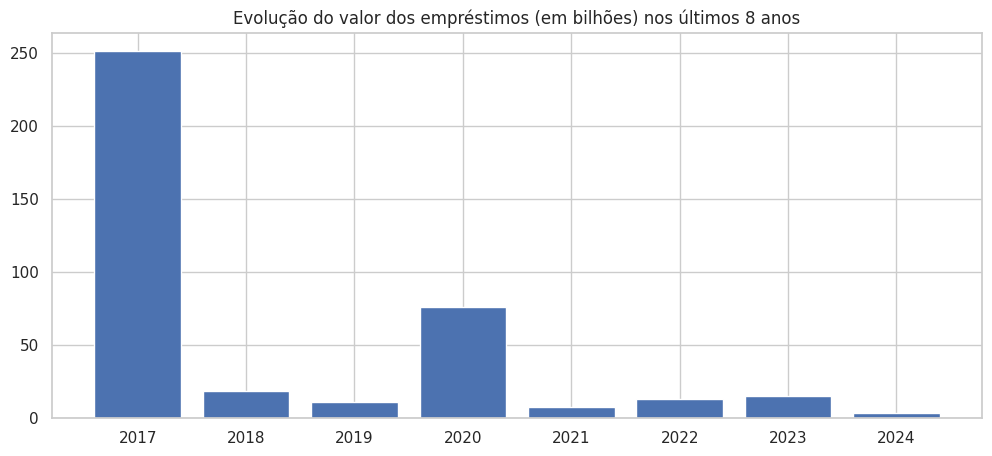

In [38]:
plt.figure(figsize=(12,5))
plt.title('Evolução do valor dos empréstimos (em bilhões) nos últimos 8 anos')
plt.bar(loan.index, loan.Sum);